# Applying Filtering, Ordering and Grouping to Queries

### Connecting to a PostgreSQL DB on AWS

In [18]:
dialect_driver = 'postgresql+psycopg2://'
user_pass = 'student:datacamp'
host = '@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com'
port = ':5432/census'

In [19]:
from sqlalchemy import create_engine
from sqlalchemy import select
from sqlalchemy import MetaData, Table

In [54]:
# engine = create_engine(dialect_driver+user_pass+host+port)
# Using local db for connection
engine = create_engine('sqlite:///census.sqlite')

In [40]:
engine.table_names()

['census', 'state_fact']

### Filter data selected from a Table

In [41]:
metadata = MetaData()
census = Table('census', metadata, autoload=True, autoload_with=engine)
connection = engine.connect()

In [42]:
stmt = select([census])

In [43]:
stmt = stmt.where(census.columns.state == 'New York')

In [45]:
results = connection.execute(stmt).fetchall()
results[:5]

[('New York', 'M', 0, 126237, 128088),
 ('New York', 'M', 1, 124008, 125649),
 ('New York', 'M', 2, 124725, 121615),
 ('New York', 'M', 3, 126697, 120580),
 ('New York', 'M', 4, 131357, 122482)]

### Filter data selected from a Table - Expressions

In [46]:
stmt = select([census])

In [47]:
states = ['New York', 'California', 'Texas']

In [48]:
stmt = stmt.where(census.columns.state.in_(states))

In [49]:
for result in connection.execute(stmt):
     print(result.state, result.pop2000)

New York 126237
New York 124008
New York 124725
New York 126697
New York 131357
New York 133095
New York 134203
New York 137986
New York 139455
New York 142454
New York 145621
New York 138746
New York 135565
New York 132288
New York 132388
New York 131959
New York 130189
New York 132566
New York 132672
New York 133654
New York 132121
New York 126166
New York 123215
New York 121282
New York 118953
New York 123151
New York 118727
New York 122359
New York 128651
New York 140687
New York 149558
New York 139477
New York 138911
New York 139031
New York 145440
New York 156168
New York 153840
New York 152078
New York 150765
New York 152606
New York 159345
New York 148628
New York 147892
New York 144195
New York 139354
New York 141953
New York 131875
New York 128767
New York 125406
New York 124155
New York 125955
New York 118542
New York 118532
New York 124418
New York 95025
New York 92652
New York 90096
New York 95340
New York 83273
New York 77213
New York 77054
New York 72212
New York 70967
N

### Filter data selected from a Table

In [50]:
from sqlalchemy import and_

In [51]:
stmt = select([census])

In [52]:
stmt = stmt.where(
    and_(census.columns.state == 'California',
         census.columns.sex != 'M'
         )
)

In [53]:
for result in connection.execute(stmt):
     print(result.age, result.sex)

0 F
1 F
2 F
3 F
4 F
5 F
6 F
7 F
8 F
9 F
10 F
11 F
12 F
13 F
14 F
15 F
16 F
17 F
18 F
19 F
20 F
21 F
22 F
23 F
24 F
25 F
26 F
27 F
28 F
29 F
30 F
31 F
32 F
33 F
34 F
35 F
36 F
37 F
38 F
39 F
40 F
41 F
42 F
43 F
44 F
45 F
46 F
47 F
48 F
49 F
50 F
51 F
52 F
53 F
54 F
55 F
56 F
57 F
58 F
59 F
60 F
61 F
62 F
63 F
64 F
65 F
66 F
67 F
68 F
69 F
70 F
71 F
72 F
73 F
74 F
75 F
76 F
77 F
78 F
79 F
80 F
81 F
82 F
83 F
84 F
85 F


### Ordering by a Single Column

In [55]:
stmt = select([census.columns.state])

In [57]:
stmt = stmt.order_by(census.columns.state)

In [58]:
results = connection.execute(stmt).fetchall()

In [59]:
results[:5]

[('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',)]

### Ordering in Descending Order by a Single Column

In [60]:
from sqlalchemy import desc

In [61]:
stmt = select([census])
rev_stmt = stmt.order_by(desc(census.columns.state))

In [62]:
rev_results = connection.execute(rev_stmt).fetchall()
rev_results[:10]

[('Wyoming', 'M', 0, 3236, 4066),
 ('Wyoming', 'M', 1, 3245, 4159),
 ('Wyoming', 'M', 2, 3102, 4058),
 ('Wyoming', 'M', 3, 3103, 3745),
 ('Wyoming', 'M', 4, 3166, 3633),
 ('Wyoming', 'M', 5, 3157, 3647),
 ('Wyoming', 'M', 6, 3421, 3667),
 ('Wyoming', 'M', 7, 3503, 3498),
 ('Wyoming', 'M', 8, 3577, 3479),
 ('Wyoming', 'M', 9, 3744, 3512)]

### Ordering by Multiple Columns

In [64]:
stmt = select([census.columns.state, census.columns.age])
stmt = stmt.order_by(census.columns.state, desc(census.columns.age))
results = connection.execute(stmt).fetchall()
results[:20]

[('Alabama', 85),
 ('Alabama', 85),
 ('Alabama', 84),
 ('Alabama', 84),
 ('Alabama', 83),
 ('Alabama', 83),
 ('Alabama', 82),
 ('Alabama', 82),
 ('Alabama', 81),
 ('Alabama', 81),
 ('Alabama', 80),
 ('Alabama', 80),
 ('Alabama', 79),
 ('Alabama', 79),
 ('Alabama', 78),
 ('Alabama', 78),
 ('Alabama', 77),
 ('Alabama', 77),
 ('Alabama', 76),
 ('Alabama', 76)]

### Counting Distinct Data

In [65]:
from sqlalchemy import func

In [66]:
stmt = select([func.count(census.columns.state.distinct())])
distinct_state_count = connection.execute(stmt).scalar()
distinct_state_count

51

### Count of Records by State

In [67]:
stmt = select([census.columns.state, func.count(census.columns.age)])
stmt = stmt.group_by(census.columns.state)

In [68]:
results = connection.execute(stmt).fetchall()

In [69]:
results[:5]

[('Alabama', 172),
 ('Alaska', 172),
 ('Arizona', 172),
 ('Arkansas', 172),
 ('California', 172)]

In [70]:
results[0].keys()

['state', 'count_1']

### Determining the Population Sum by State

In [71]:
pop2008_sum = func.sum(census.columns.pop2008).label('population')
stmt = select([census.columns.state, pop2008_sum])
stmt = stmt.group_by(census.columns.state)
results = connection.execute(stmt).fetchall()
results[:5]

[('Alabama', 4649367),
 ('Alaska', 664546),
 ('Arizona', 6480767),
 ('Arkansas', 2848432),
 ('California', 36609002)]

In [72]:
results[0].keys()

['state', 'population']

### SQLAlchemy ResultsProxy and Pandas Dataframes

In [73]:
import pandas as pd

In [89]:
df = pd.DataFrame(results)
df.columns = results[0].keys()
df = df.sort_values('population', ascending=False).set_index('state')

In [90]:
df.head()

,population
state,
California,36609002
Texas,24214127
New York,19465159
Florida,18257662
Illinois,12867077


### From SQLAlchemy results to a Graph

In [76]:
import matplotlib.pyplot as plt

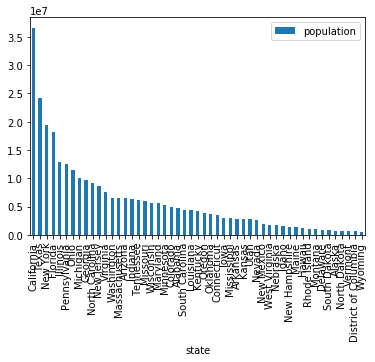

In [91]:
df.plot.bar()
plt.show()